# Data EXTRACTION, PREPROCESSING, and CLEANING
We wrote this SQL query bellow:
```
SELECT A.[ЧекККМ ID] AS CheckID
	  ,A.[ЧекККМ Дата] AS DateAndTime
	  ,A.[ЧекККМ Склад ID] AS StoreID
	  ,REPLACE(C.[Склады Наименование],'Склад','Store') AS StoreName
	  ,A.[ЧекККМ Партнер ID] AS CustomerID
	  ,REPLACE(D.[Партнеры Наименование],'Розничный покупатель','Buyer') AS CustomerName
	  ,D.[Партнеры Дата Регистрации] AS CustomerRegDate
	  ,D.[Партнеры Дата Рождения] AS CustomerBirthDate
	  ,B.[ЧекККМ.Товары Номенклатура ID] AS ProductID
	  ,REPLACE(E.[Номенклатура Наименование],',','/') AS ProductName  --REPLACING COMMAS TO AVOID ERRORS IN CSV FILE
      ,E.[Номенклатура Артикул] AS ProductArticle
	  ,B.[ЧекККМ.Товары Характеристика ID] AS CharacteristicID
	  ,REPLACE(F.[ХарактеристикиНоменклатуры Наименование],',','.') AS Size --REPLACING COMMAS TO AVOID ERRORS IN CSV FILE
	  ,B.[ЧекККМ.Товары Количество] AS Quantity
      ,B.[ЧекККМ.Товары Цена] AS Price
	  ,B.[ЧекККМ.Товары Сумма Автоматической Скидки] + B.[ЧекККМ.Товары Сумма Ручной Скидки] AS Discount
	  ,B.[ЧекККМ.Товары Сумма] AS Summ
FROM [_six_squad_ut].[dbo].[Документы.ЧекККМ] AS A
LEFT JOIN [_six_squad_ut].[dbo].[Документы.ЧекККМ.Товары] AS B
ON A.[ЧекККМ ID] = B.[ЧекККМ ID]
LEFT JOIN [_six_squad_ut].[dbo].[Справочники.Склады] AS C
ON A.[ЧекККМ Склад ID] = C.[Склады ID]
LEFT JOIN [_six_squad_ut].[dbo].[Справочники.Партнеры] AS D
ON A.[ЧекККМ Партнер ID] = D.[Партнеры ID]
LEFT JOIN [_six_squad_ut].[dbo].[Справочники.Номенклатура] AS E
ON B.[ЧекККМ.Товары Номенклатура ID] = E.[Номенклатура ID]
LEFT JOIN [_six_squad_ut].[dbo].[Справочники.ХарактеристикиНоменклатуры] AS F
ON B.[ЧекККМ.Товары Характеристика ID] = F.[ХарактеристикиНоменклатуры ID]
WHERE F.[ХарактеристикиНоменклатуры Наименование] <> 'Тест' --FILTERING OUT TEST TRANSACTIONS
ORDER BY A.[ЧекККМ Дата]
```

The data is stored in the local server of the private Kazakhstan Sneakershop company, to which we connected using Remote Desktop Protocol. The data was stored in Microsoft SQL Server, and we typed the query above to extract it.

1.   We had to JOIN 6 Tables labeled as A (Transaction Data), B (Products within transaction), C (Location Data), D (Customer Data), E (Product Nomenclature Data), and F (Product Characteristics Data).
2.   Each Table had redundant and unnecessary 30+ columns, which were filtered out by the SELECT query by specifying the fields needed in one big Dataframe.
3.	We had a challenge that every table name, columns, and some rows were in Russian Language, and we renamed them using Aliases (AS) and the REPLACE function to replace commas TO AVOID ERRORS IN THE CSV FILE.
4.	We Filtered out the 'Test' data points using the WHERE function because it doesn't make sense.
5.	We ordered the table using the ORDER BY function so that it will be in the correct chronological order.




# DATA EXPLORATION

In [68]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# Read store data
df_transactions = pd.read_csv('https://raw.githubusercontent.com/d-roho/BA820-TeamA6/main/Data%20files/Master%20Transactions%20Table.csv?token=GHSAT0AAAAAACNG2Q334OKV3T66VR4K46R2ZO5KCQA', delimiter= ';')
df_articles = pd.read_csv('https://raw.githubusercontent.com/d-roho/BA820-TeamA6/main/Data%20files/Product%20Article%20Details%20-%20Sheet1.csv?token=GHSAT0AAAAAACNG2Q32A4SE2DF7EWDPMWD4ZO5KCXQ', delimiter= ',')

# Replace Russian product names with English
dict_articles = df_articles.set_index('Product ID')['Product Name'].to_dict()
df_transactions['ProductNameNew'] = df_transactions['ProductArticle'].map(dict_articles)
df_transactions['ProductNameNew'].fillna('nan', inplace=True)

for i,r in df_transactions.iterrows():
    if df_transactions.loc[i, 'ProductNameNew'] != 'nan':
        df_transactions.loc[i, 'ProductName'] = df_transactions.loc[i, 'ProductNameNew']
df_transactions.drop('ProductNameNew', axis=1, inplace=True)
# Display DF
df_transactions.head()


,CheckID,DateAndTime,StoreID,StoreName,CustomerID,CustomerName,CustomerRegDate,CustomerBirthDate,ProductID,ProductName,ProductArticle,CharacteristicID,Size,Quantity,Price,Discount,Summ
0,963700505601437611ED79E88B2ADAF1,2022-12-12 09:51:58,963700505601437611ED75F098F0D0F2,Store FORUM,913408979892110F11ED60BAE5B67FDC,Buyer,1980-01-01 00:00:00,2001-01-01 00:00:00,963700505601437611ED76D571C900D0,Bomber Jacket Iconic Players -,FT0015,963700505601437611ED76D5CC8A6730,2XL,1.0,83000.0,0.0,83000.0
1,963700505601437611ED7DC11AB805C7,2022-12-17 07:13:28,963700505601437611ED75F098F0D0F2,Store FORUM,913408979892110F11ED60BAE5B67FDC,Buyer,1980-01-01 00:00:00,2001-01-01 00:00:00,963700505601437611ED7ADAA5BDD6DE,NOCTA Hot Step Air Terra,DH4692-002,963700505601437611ED7AE596BCE2F7,9.5,1.0,138000.0,8280.0,129720.0
2,963700505601437611ED7DC11AB805C7,2022-12-17 07:13:28,963700505601437611ED75F098F0D0F2,Store FORUM,913408979892110F11ED60BAE5B67FDC,Buyer,1980-01-01 00:00:00,2001-01-01 00:00:00,963700505601437611ED7ADDC672C19A,M NRG NOCTA SS TOP,DM1724-010,963700505601437611ED7AE5AB1C1750,L,1.0,39000.0,2340.0,36660.0
3,963700505601437611ED7DC11AB805C9,2022-12-17 11:34:15,963700505601437611ED75F098F0D0F2,Store FORUM,913408979892110F11ED60BAE5B67FDC,Buyer,1980-01-01 00:00:00,2001-01-01 00:00:00,963700505601437611ED75485EA48889,FRA JD FFBB LOGO SS,CV8138-419,963700505601437611ED755A89273B56,XL,1.0,29000.0,0.0,29000.0
4,963700505601437611ED7DC11AB805CB,2022-12-17 12:59:23,963700505601437611ED75F098F0D0F2,Store FORUM,913408979892110F11ED60BAE5B67FDC,Buyer,1980-01-01 00:00:00,2001-01-01 00:00:00,963700505601437611ED755791B0DF6C,M J JUMPMAN SS CREW,CJ0921-011,963700505601437611ED755A89273B67,S,1.0,18000.0,0.0,18000.0


In [69]:
df_transactions.describe()

,Quantity,Price,Discount,Summ
count,7002.000000,7002.000000,7002.000000,7002.000000
mean,1.015139,63306.588832,3289.081348,60039.157908
std,0.165774,49368.265795,10015.252213,48074.184529
min,1.000000,6500.000000,0.000000,3885.750000
25%,1.000000,24200.000000,0.000000,22500.000000
50%,1.000000,51000.000000,0.000000,46000.000000
75%,1.000000,97000.000000,0.000000,94000.000000
max,6.000000,745000.000000,149000.000000,649000.000000


The table above shows that there are 7002 transactions in total, with an average quantity of approximately 1.02, an average price of around 63306 KZT (Kazakhstan currency), an average discount of about 3289 KZT (Kazakhstan currency), and an average sum of approximately 60,039 KZT (Kazakhstan currency). It also provides information on the variability and distribution of these values.

In [70]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CheckID            7002 non-null   object 
 1   DateAndTime        7002 non-null   object 
 2   StoreID            7002 non-null   object 
 3   StoreName          7002 non-null   object 
 4   CustomerID         7002 non-null   object 
 5   CustomerName       7002 non-null   object 
 6   CustomerRegDate    7002 non-null   object 
 7   CustomerBirthDate  7002 non-null   object 
 8   ProductID          7002 non-null   object 
 9   ProductName        7002 non-null   object 
 10  ProductArticle     7002 non-null   object 
 11  CharacteristicID   7002 non-null   object 
 12  Size               7002 non-null   object 
 13  Quantity           7002 non-null   float64
 14  Price              7002 non-null   float64
 15  Discount           7002 non-null   float64
 16  Summ               7002 

The columns contain different types of information: some are words or phrases (like names and IDs), while others are numbers. Each column has 7002 pieces of information, showing that none of them are empty or missing in the list of data.

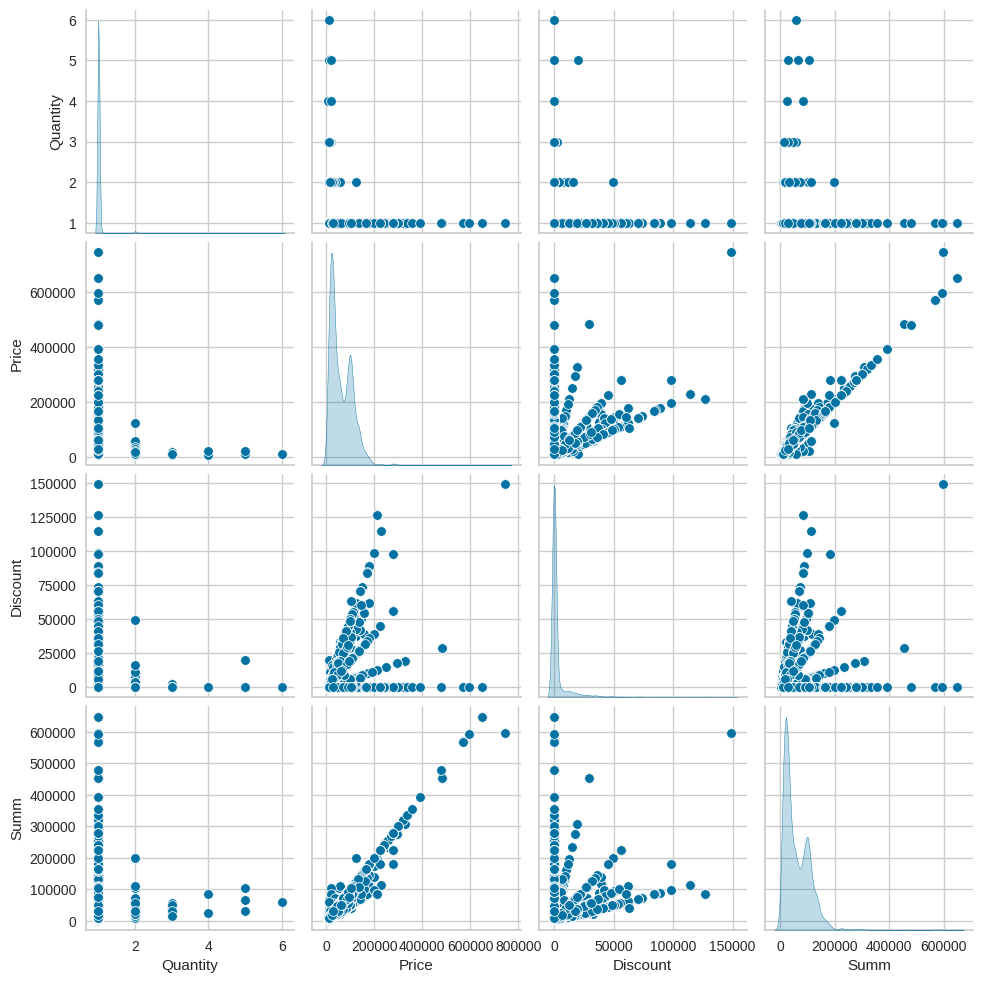

In [71]:
sns.pairplot(df_transactions, diag_kind = 'kde')
plt.show();

This pairplot shows the correlation between different variables (e.g., Quantity, Price, Discount, Summ). Red cells indicate positive correlation, while blue cells represent negative correlation. The diagonal cells are perfectly correlated (red). For instance, Price and Summ have a strong positive correlation. Since this chart does not give us any significant results lets proceed to plotting other visuals.

We can also see the distribution of the numeric variables

*   Quantity - vast majority of quantities is 1 indicating majority of people purchase only 1 of each product. This is because these are high-priced products purchased in limited quantities.
*   Price - it is bimodal, representing two main categories of products - premium (moderate cost) & luxury (high cost)
*   Discount - A majority of values are close to zero. This is due to the fact that most product are never discounted.
*   Sum - Again, it is bimodal, reflecting the distribution of Price (as Summ is price * quantity)




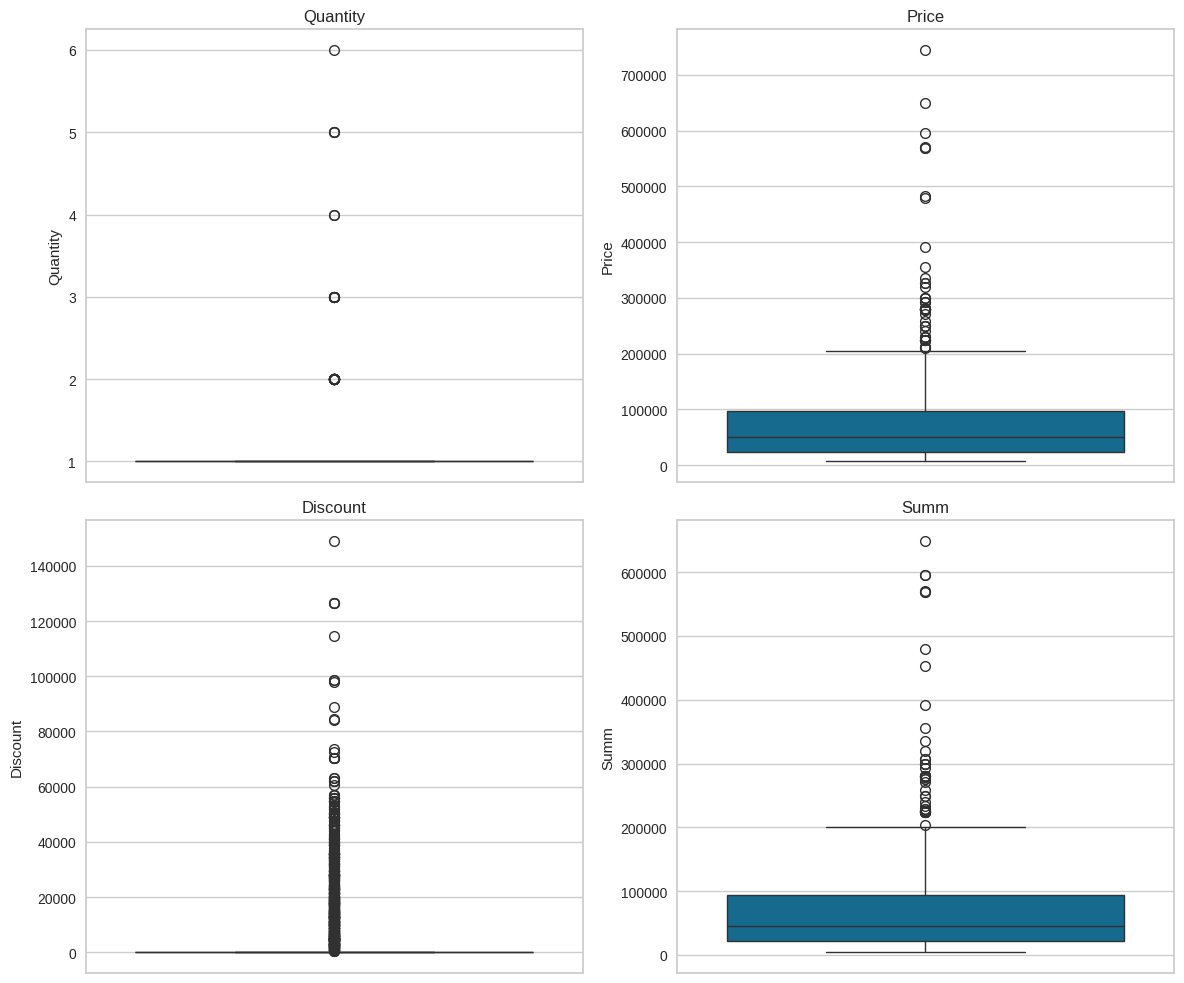

In [72]:

import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Box plot for Quantity
sns.boxplot(y=df_transactions['Quantity'], ax=axes[0, 0])
axes[0, 0].set_title('Quantity')

# Box plot for Price
sns.boxplot(y=df_transactions['Price'], ax=axes[0, 1])
axes[0, 1].set_title('Price')

# Box plot for Discount
sns.boxplot(y=df_transactions['Discount'], ax=axes[1, 0])
axes[1, 0].set_title('Discount')

# Box plot for Summ
sns.boxplot(y=df_transactions['Summ'], ax=axes[1, 1])
axes[1, 1].set_title('Summ')

# Adjust layout
plt.tight_layout()
plt.show()


There are a significant number of outliers for Price, Summ and Discount

* Price and Summ - Outliers are luxury items sold at extremely high prices. For example, S'YTE x Junji Ito UZUMAKI 1000% Bearbrick which is sold for Retail Price of 1600 USD
* Discount - Since most producs are never discounted, all the outliers are discounts greater than zero.
* Quantity - Most items are purchases in single quantity, as previously mentioned. Any greater quantities are outliers compared to the majoritty of the dataset.

Since these outliers reflect the reality of the business, and are not mistakes or noise, we will keep them for further analysis.

Text(0, 0.5, 'Total Transactions')

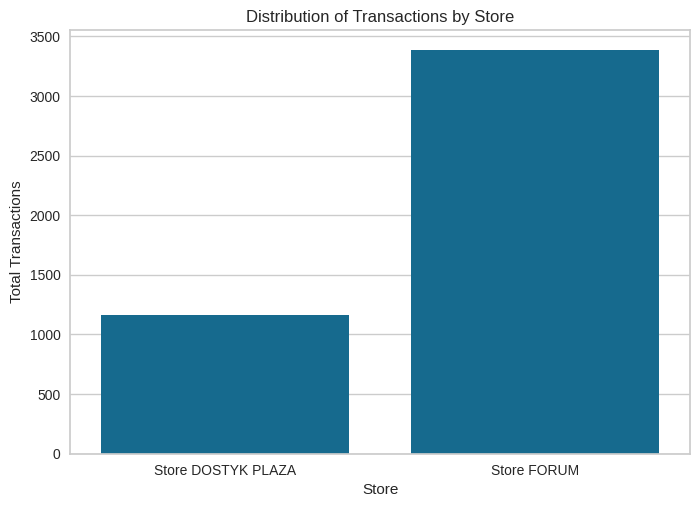

In [73]:
# Transaction by store
store_transactions = df_transactions.groupby('StoreName').agg({"CheckID": pd.Series.nunique}).reset_index()
sns.barplot(x='StoreName', y='CheckID', data=store_transactions )
plt.title('Distribution of Transactions by Store')
plt.xlabel('Store')
plt.ylabel('Total Transactions')

Six Squad has two stores, FORUM (the first store launched about December 2022) and DOSTYK PLAZA (the second store launched about December 2023). Hence, FORUM has about 3x the number of transactions as DOSTYK PLAZA. It is to be noted that the new store is growing at a faster rate than the old store, accounting for the time each store has been opened for.


### Lets merge transactions data with product article data


In [74]:
df_product = df_articles.loc[:]
df_product.head()

,#,Product ID,Product Name,Image URL,Gender,Brand,Category,Color,Collaboration,Weights in kg,Dimensions,Sneakers Model,Season
0,1,DC3673-011,JORDAN H86 JM WASHED CAP,https://shelta.eu/pub_images/large/DC3673-011_...,Unisex,Jordan,Caps,Black,False,"0,1",10x5x2,NaN,Summer
1,2,DM5231-040,W J HERITAGE BOTTOM,https://static.insales-cdn.com/images/products...,Women,Jordan,Trousers,Multicolor,False,"0,2",10x10x10,NaN,Summer
2,3,CJ0921-011,M J JUMPMAN SS CREW,https://static.insales-cdn.com/images/products...,Men,Jordan,T-shirts,Black,False,"0,5",20x15x3,NaN,Summer
3,4,DH0833-660,Air Jordan XXXVI Low,https://static.insales-cdn.com/images/products...,Men,Jordan,Sneakers,Red,False,"0,5",25x15x10,Air Jordan XXXVI,Demi-season
4,5,CJ0921-687,M J JUMPMAN SS CREW,https://static.insales-cdn.com/images/products...,Men,Jordan,T-shirts,Red,False,"0,5",20x15x3,NaN,Summer


This dataframe contains more specific information on product category, color, collaboration status etc.. We will merge it with the transactions table so we have all relevant info in one dataframe.

In [75]:
merged_df = pd.merge(df_transactions, df_product, left_on='ProductArticle', right_on='Product ID', how='left')
merged_df.head()

,CheckID,DateAndTime,StoreID,StoreName,CustomerID,CustomerName,CustomerRegDate,CustomerBirthDate,ProductID,ProductName,...,Image URL,Gender,Brand,Category,Color,Collaboration,Weights in kg,Dimensions,Sneakers Model,Season
0,963700505601437611ED79E88B2ADAF1,2022-12-12 09:51:58,963700505601437611ED75F098F0D0F2,Store FORUM,913408979892110F11ED60BAE5B67FDC,Buyer,1980-01-01 00:00:00,2001-01-01 00:00:00,963700505601437611ED76D571C900D0,Bomber Jacket Iconic Players -,...,https://static.insales-cdn.com/images/products...,Men,Football Town,Bombers,Black,False,"0,1",2x2x2,NaN,Demi-season
1,963700505601437611ED7DC11AB805C7,2022-12-17 07:13:28,963700505601437611ED75F098F0D0F2,Store FORUM,913408979892110F11ED60BAE5B67FDC,Buyer,1980-01-01 00:00:00,2001-01-01 00:00:00,963700505601437611ED7ADAA5BDD6DE,NOCTA Hot Step Air Terra,...,https://static.insales-cdn.com/images/products...,Men,Nike,Sneakers,Black,True,"0,5",25x15x10,NaN,Demi-season
2,963700505601437611ED7DC11AB805C7,2022-12-17 07:13:28,963700505601437611ED75F098F0D0F2,Store FORUM,913408979892110F11ED60BAE5B67FDC,Buyer,1980-01-01 00:00:00,2001-01-01 00:00:00,963700505601437611ED7ADDC672C19A,M NRG NOCTA SS TOP,...,https://static.insales-cdn.com/images/products...,Men,Nike,T-shirts,Black,True,"0,5",20x15x3,NaN,Summer
3,963700505601437611ED7DC11AB805C9,2022-12-17 11:34:15,963700505601437611ED75F098F0D0F2,Store FORUM,913408979892110F11ED60BAE5B67FDC,Buyer,1980-01-01 00:00:00,2001-01-01 00:00:00,963700505601437611ED75485EA48889,FRA JD FFBB LOGO SS,...,https://static.insales-cdn.com/images/products...,Men,Jordan,T-shirts,Blue,False,"0,5",20x15x3,NaN,Summer
4,963700505601437611ED7DC11AB805CB,2022-12-17 12:59:23,963700505601437611ED75F098F0D0F2,Store FORUM,913408979892110F11ED60BAE5B67FDC,Buyer,1980-01-01 00:00:00,2001-01-01 00:00:00,963700505601437611ED755791B0DF6C,M J JUMPMAN SS CREW,...,https://static.insales-cdn.com/images/products...,Men,Jordan,T-shirts,Black,False,"0,5",20x15x3,NaN,Summer


In [76]:
merged_df.describe()

,Quantity,Price,Discount,Summ,#
count,7002.000000,7002.000000,7002.000000,7002.000000,7001.000000
mean,1.015139,63306.588832,3289.081348,60039.157908,759.462220
std,0.165774,49368.265795,10015.252213,48074.184529,405.937102
min,1.000000,6500.000000,0.000000,3885.750000,1.000000
25%,1.000000,24200.000000,0.000000,22500.000000,415.000000
50%,1.000000,51000.000000,0.000000,46000.000000,785.000000
75%,1.000000,97000.000000,0.000000,94000.000000,1111.000000
max,6.000000,745000.000000,149000.000000,649000.000000,1481.000000


In [77]:
# Converting DateAndTime to datetime
from datetime import datetime
merged_df['DateAndTime'] = pd.to_datetime(merged_df['DateAndTime'])
merged_df['date_column'] = merged_df['DateAndTime'].dt.date

In [78]:
# Calculating total sales by Date and Store
df_plot_1 = merged_df.groupby('date_column').agg({'Quantity': 'sum', 'StoreName': 'first', 'Summ': 'sum'})

df_plot_1

,Quantity,StoreName,Summ
date_column,,,
2022-12-12,1.0,Store FORUM,83000.0
2022-12-17,13.0,Store FORUM,919020.0
2022-12-18,13.0,Store FORUM,1160880.0
2022-12-19,15.0,Store FORUM,989000.0
2022-12-20,18.0,Store FORUM,1529000.0
...,...,...,...
2024-02-20,12.0,Store DOSTYK PLAZA,923775.0
2024-02-21,14.0,Store DOSTYK PLAZA,1128600.0
2024-02-22,15.0,Store DOSTYK PLAZA,1028200.0


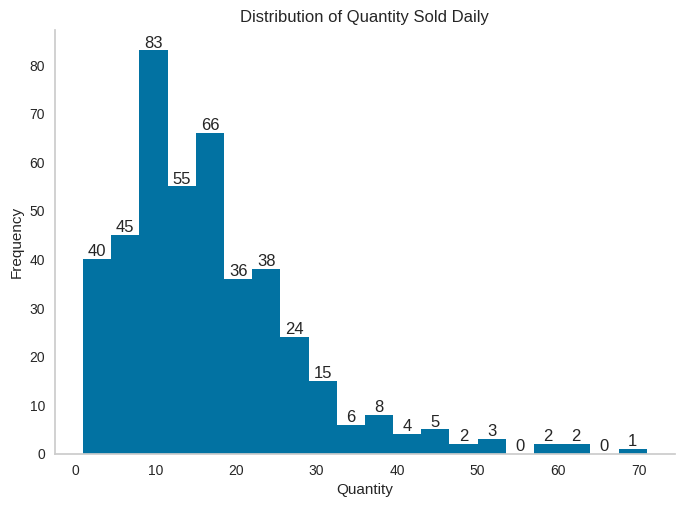

In [79]:
from matplotlib import pyplot as plt

ax = df_plot_1['Quantity'].plot(kind='hist', bins=20, title='Distribution of Quantity Sold Daily')

for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(False)
plt.show()


Here we have a distribution of the  quantity of items sold daily. The mean quantity sold is roughly 20 items.

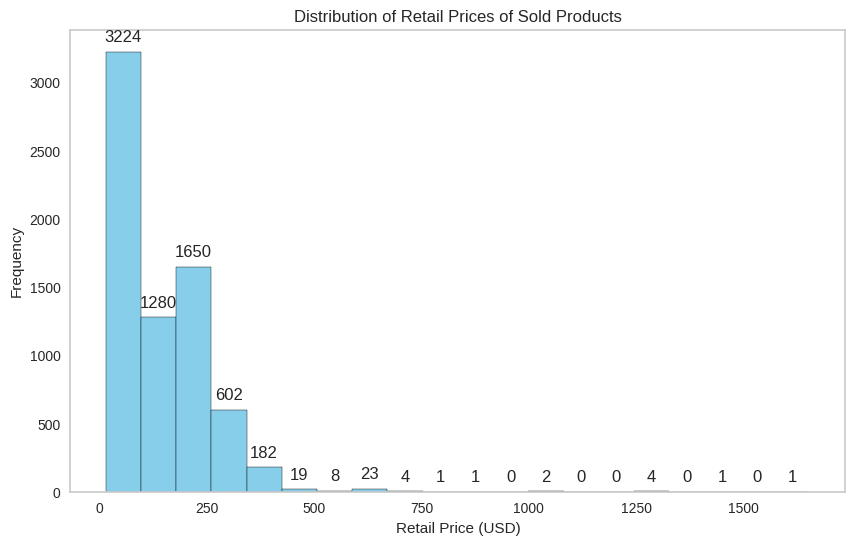

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(df_transactions['Price']/450, bins=20, color='skyblue', edgecolor='black')

for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().annotate(f'{height:.0f}',
                       (rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 5),
                       textcoords='offset points',
                       ha='center',
                       va='bottom')

plt.title('Distribution of Retail Prices of Sold Products')
plt.xlabel('Retail Price (USD)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


We can see that the average price of products is roughly 150-200 USD, with some outliers exceeding the 500 USD mark.

In [81]:
import plotly.express as px

df_plot_1.reset_index(inplace=True)

fig = px.line(df_plot_1, x='date_column', y='Summ', color='StoreName')

fig.update_layout(
    title="Daily Net Sales",
    xaxis_title="Date",
    yaxis_title="Net Sales",
    hovermode="x",
)

fig.show()


There is a consistent and significant uptick in Net Sales over the weekends across both stores.

# Market Basket Analysis

In [82]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [83]:
merged_df['CheckID'].value_counts()

A2BEA83E4941C7C411EDF1A6153559D6    19
A3E18B555238DE9911EDECE698CC337A    18
B6A9F3D42C1B20B211EE6B46F8A25E0D    14
B6E1D93CB721767C11EE976741D2E752    12
B6E7EB4FF2EF782011EE9C047F2CA510    11
                                    ..
80EAAC2FC0CA8E7811EE1753EC2E0D10     1
80EB95558271282511EE17E1B9C55E33     1
80EB95558271282511EE17E2F0901DD4     1
80EB95558271282511EE17ED63F3C374     1
B72DA8CC849C518A11EED32C318E8C4F     1
Name: CheckID, Length: 4545, dtype: int64

In [84]:
transaction_list = merged_df.groupby('CheckID')['ProductName'].agg(list)
transaction_list

CheckID
80CDF2721D3090D211EE003F65A567E4                                    [W NIKE DUNK LOW]
80CDF2721D3090D211EE0065DF800E65    [Kevin Durant Nets_BLACK/FLT SILVER/DURANT KEVIN]
80CDF2721D3090D211EE006AE64EF24D    [Nike Court Vision LO_WHITE/ATMOSPHERE-UNIVERS...
80CDF2721D3090D211EE007218CCAD17            [Jordan Everyday Max_BLACK/WHITE/GYM RED]
80CDF2721D3090D211EE00731A2E0927                                 [WMNS NIKE DUNK LOW]
                                                          ...                        
B72DA8CC849C518A11EED315877887E6                                     [The Bird Black]
B72DA8CC849C518A11EED319C3033CE6    [Jordan Artist Series by Jacob Rochester_RATTA...
B72DA8CC849C518A11EED31A364D3309                              [WMNS AIR JORDAN 1 LOW]
B72DA8CC849C518A11EED323DAA8F97C                                 [AIR JORDAN 4 RETRO]
B72DA8CC849C518A11EED32C318E8C4F                         [U NK NRG FEARLESS PHIL TEE]
Name: ProductName, Length: 4545, dtype: object

We have successfully grouped by the transaction and product name and use agg() method to list them. Data is now ready for Endocder process.

In [85]:
encoder = TransactionEncoder()
transactions_encoded = encoder.fit(transaction_list).transform(transaction_list)

df_encoded = pd.DataFrame(transactions_encoded,columns=encoder.columns_)
df_encoded

,400% & 100% Bearbrick Set - Coca-Cola (Georgia Green),400% & 100% Bearbrick Set - Jerry Classic Color (Tom & Jerry),400% & 100% Bearbrick Set - Keith Haring v9 (Dancing Dogs),400% & 100% Bearbrick Set - Michelangelo Chrome (Teenage Mutant Ninja Turtles),400% & 100% Bearbrick Set - Mr. Incredible (Walt Disney),400% & 100% Bearbrick Set - Robin (The New Batman Adventures),400% & 100% Bearbrick Set - The Rolling Stones (Hot Lips logo - Black Chrome),400% & 100% Bearbrick set - ''The 53 Stations'' (Utagawa Kuniyoshi),400% & 100% Bearbrick set - Doubly Warped Black Hole (NASA),400% & 100% Bearbrick set - Girl with a Pearl Earring by Johannes Vermeer,...,Шорты MARKET Fine Cut Reversible,кроссовки AIR FORCE 1 07,кроссовки AJ1 Low CUSTOM YUG,кроссовки NIKE DUNK HI RETRO PRM,кроссовки NIKE DUNK LOW RETRO PRM,кроссовки W NIKE DUNK LOW,кроссовки W NIKE DUNK LOW TWIST,кроссовки WMNS AIR FORCE 1 07 MID,кроссовки WMNS NIKE DUNK LOW,сумка JUMPMAN DUFFLE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4540,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4541,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4542,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


As we can see above that we have 1082 products and 4545 transactions that were made. Now our data is ready for Market Basket Analysis

## What are the most frequent itemsets across different stores?

In [86]:
frequent_itemsets = apriori(df_encoded,min_support=0.0015,use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
251,0.022662,(WMNS AIR JORDAN 1 LOW)
33,0.020022,(Bearbrick Blindbox series 46 by Medicom Toy)
42,0.019142,"(CR7 Fashion, 2-Pack Trunk Mesh)"
44,0.018482,"(CR7 Trunk, 3-pack)"
227,0.015842,(U J ED CUSH POLY CREW 3PR 144)
...,...,...
159,0.001540,(NIKE AIR MAX PLUS III PRM)
156,0.001540,(NEW YORK YANKEES TEAM COLOUR CORD NAVY 9FIFTY...
153,0.001540,(MN Skate Half Cab '92)
152,0.001540,(M NSW TEE OC PK3 LBR)



*   The threshold of 0.15% was used to filter the itemsets, meaning only those appearing in at least 0.15% ( 7 times been purchased) of all transactions were considered frequent. This helps in focusing the analysis on itemsets with a significant presence and resulted in considering 276 itemsets as frequent.



*   (WMNS AIR JORDAN 1 LOW) with a support of  0.022662% of all transactions. This means this product is the most popular or commonly purchased item among the dataset, appearing in about 2.27% of all transactions, which has been purchased approximately 103 times.



In [87]:
rules = association_rules(frequent_itemsets,metric="support",min_threshold=0.0015)
rules.sort_values("leverage", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Medicom Toy Bearbrick Blindbox series 45 by M...,(Bearbrick Blindbox series 46 by Medicom Toy),0.015402,0.020022,0.005501,0.357143,17.837520,0.005192,1.524410,0.958704
1,(Bearbrick Blindbox series 46 by Medicom Toy),(Medicom Toy Bearbrick Blindbox series 45 by M...,0.020022,0.015402,0.005501,0.274725,17.837520,0.005192,1.357552,0.963224
2,(CR7 Kids Socks 3-pack),(CR7 Boys Trunk 2-pack),0.009461,0.014961,0.003740,0.395349,26.424419,0.003599,1.629102,0.971346
3,(CR7 Boys Trunk 2-pack),(CR7 Kids Socks 3-pack),0.014961,0.009461,0.003740,0.250000,26.424419,0.003599,1.320719,0.976770
4,(CR7 Fashion Trunk Org 2-pack),"(CR7 Trunk, 3-pack)",0.012981,0.018482,0.001980,0.152542,8.253632,0.001740,1.158191,0.890400
5,"(CR7 Trunk, 3-pack)",(CR7 Fashion Trunk Org 2-pack),0.018482,0.012981,0.001980,0.107143,8.253632,0.001740,1.105461,0.895390
6,"(CR7 Fashion, 2-Pack Trunk Mesh)","(CR7 Trunk, 3-pack)",0.019142,0.018482,0.001540,0.080460,4.353448,0.001186,1.067401,0.785330
7,"(CR7 Trunk, 3-pack)","(CR7 Fashion, 2-Pack Trunk Mesh)",0.018482,0.019142,0.001540,0.083333,4.353448,0.001186,1.070027,0.784802


These rules suggest a strong and specific customer interest in collecting or purchasing these series together, likely due to related themes, designs, or collector value.

* Rule 1: When Medicom Toy Bearbrick Blindbox series 45 is purchased, Bearbrick Blindbox series 46 is also likely to be purchased.

* Their support of 0.005501, Both items appear together in about 0.55% of all transactions.

* Confidence of 0.357143: There's a 35.71% chance of series 46 being purchased when series 45 is bought.

* Lift of 17.837520: The likelihood of both being purchased together is almost 18 times higher than if they were purchased independently.

* Leverage of 0.005192: This indicates a significant positive, meaning the purchase of one greatly increases the likelihood of the other being purchased.

## Purchasing patterns by the day of week

In [88]:
def categorize_day(x):
    if x.dayofweek < 5:  # Monday=0, Sunday=6
        return 'Weekday'
    else:
        return 'Weekend'

merged_df['DayType'] = merged_df['DateAndTime'].apply(categorize_day)


We have split our data into two time periods: weekdays and weekends. We implemented this approach instead of examining all seven days of the week individually because the purchasing patterns in a clothing store are not like those in a supermarket, where people's needs change daily.

In [89]:
weekday_basket = merged_df[merged_df['DayType'] == 'Weekday'].groupby('CheckID')['ProductName'].agg(list)
weekend_basket = merged_df[merged_df['DayType'] == 'Weekend'].groupby('CheckID')['ProductName'].agg(list)

In [90]:
te_data_weekday = encoder.fit(weekday_basket).transform(weekday_basket)
df_encoded_weekday = pd.DataFrame(te_data_weekday, columns=encoder.columns_)

te_data_weekend = encoder.fit(weekend_basket).transform(weekend_basket)
df_encoded_weekend = pd.DataFrame(te_data_weekend, columns=encoder.columns_)


Here encoding process been completed for weekday df and weekend df and both of them are ready now to process the marketing basket analysis. we will start with weekday.

**Weekday**

In [91]:
frequent_itemsets_weekday = apriori(df_encoded_weekday,min_support=0.001,use_colnames=True)
frequent_itemsets_weekday.sort_values(by='support', ascending=False).head(10)

,support,itemsets
449,0.022026,(WMNS AIR JORDAN 1 LOW)
58,0.021659,"(CR7 Fashion, 2-Pack Trunk Mesh)"
60,0.020925,"(CR7 Trunk, 3-pack)"
415,0.018355,(U J ED CUSH POLY CREW 3PR 144)
48,0.015786,(Bearbrick Blindbox series 46 by Medicom Toy)
57,0.013950,(CR7 Fashion Trunk Org 2-pack)
367,0.013583,(Nike Sportswear_BLACK/BLACK/BLACK)
302,0.012482,(NOCTA_BLACK/WHITE)
278,0.012115,(Medicom Toy Bearbrick Blindbox series 45 by M...
121,0.011747,(Jordan Essentials)


Comparing the frequent itemsets identified during weekdays to the overall frequent items results previously analyzed, a slight changes in purchasing behavior is been proved. Although the first five items appear in both analyses, their order of preference changes, highlighting these items as consistently popular among consumers. However, the difference in their ordering suggests that consumer preferences vary specifically during weekdays.

In [92]:
rules = association_rules(frequent_itemsets_weekday,metric="support",min_threshold=0.001)
rules.sort_values("leverage", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Medicom Toy Bearbrick Blindbox series 45 by M...,(Bearbrick Blindbox series 46 by Medicom Toy),0.012115,0.015786,0.004405,0.363636,23.035941,0.004214,1.546623,0.968320
5,(Bearbrick Blindbox series 46 by Medicom Toy),(Medicom Toy Bearbrick Blindbox series 45 by M...,0.015786,0.012115,0.004405,0.279070,23.035941,0.004214,1.370293,0.971932
23,"(CR7 Trunk, 3-pack)","(CR7 Fashion, 2-Pack Trunk Mesh)",0.020925,0.021659,0.002570,0.122807,5.669938,0.002117,1.115308,0.841234
22,"(CR7 Fashion, 2-Pack Trunk Mesh)","(CR7 Trunk, 3-pack)",0.021659,0.020925,0.002570,0.118644,5.669938,0.002117,1.110873,0.841865
34,(M J FLT ARTST FLC PANT),(M J FLT ARTST FLC PO),0.003671,0.003671,0.001468,0.400000,108.960000,0.001455,1.660548,0.994473
35,(M J FLT ARTST FLC PO),(M J FLT ARTST FLC PANT),0.003671,0.003671,0.001468,0.400000,108.960000,0.001455,1.660548,0.994473
16,(CR7 Kids Socks 3-pack),(CR7 Boys Trunk 2-pack),0.007342,0.010279,0.001468,0.200000,19.457143,0.001393,1.237151,0.955621
17,(CR7 Boys Trunk 2-pack),(CR7 Kids Socks 3-pack),0.010279,0.007342,0.001468,0.142857,19.457143,0.001393,1.158101,0.958457
19,(CR7 Fashion Trunk Org 2-pack),(CR7 Fashion Trunk 2-Pack),0.013950,0.005874,0.001468,0.105263,17.921053,0.001386,1.111082,0.957558
18,(CR7 Fashion Trunk 2-Pack),(CR7 Fashion Trunk Org 2-pack),0.005874,0.013950,0.001468,0.250000,17.921053,0.001386,1.314733,0.949778


first rule: Medicom Toy Bearbrick Blindbox Series 45 and 46
* Support of 0.004405: Both items appear together in about 0.44% of all transactions
* Confidence: 36.36% chance of series 46 being purchased when series 45 is bought
* Lift of 23.035941: The likelihood of both being purchased together is over 23 times higher than if they were purchased independently.
* Leverage of 0.004214: This significant positive leverage indicates that the purchase of one series greatly increases the likelihood of the other being purchased, reinforcing their strong association.

**Weekend**

In [93]:
frequent_itemsets_weekend = apriori(df_encoded_weekend,min_support=0.001,use_colnames=True)
frequent_itemsets_weekend.sort_values(by='support', ascending=False)

,support,itemsets
55,0.026359,(Bearbrick Blindbox series 46 by Medicom Toy)
452,0.023613,(WMNS AIR JORDAN 1 LOW)
64,0.021966,(CR7 Boys Trunk 2-pack)
274,0.020319,(Medicom Toy Bearbrick Blindbox series 45 by M...
138,0.018671,(Jordan Everyday Max_WHITE/WHITE/WHITE/BLACK)
...,...,...
145,0.001098,(Jordan Flight_BLACK)
144,0.001098,(Jordan Flight MVP_PHANTOM/RUSH ORANGE/BLACK)
377,0.001098,(Nike x Jacquemus_PEARL WHITE)
140,0.001098,(Jordan Flight Essentials_CARBON HEATHER)


Weekends shows different consumer behavior compared to weekdays, as evidenced by the analysis of frequent itemsets. During the weekends, around 558 items are categorized as frequent, where only 10 items during the weekdays. This significant difference underscores the variability in shopping patterns and preferences between these two periods.

Furthermore, the list of the items considered frequent also changes between weekdays and weekends. For instance, while the (WMNS AIR JORDAN 1 LOW) reported as the top common itemset during weekdays, it shown the second common items over the weekend. Instead, (Bearbrick Blindbox series 46 by Medicom Toy) takes the lead as the most frequent item purchased during weekends.

In [94]:
rules = association_rules(frequent_itemsets_weekend,metric="support",min_threshold=0.001)
rules.sort_values("leverage", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(CR7 Kids Socks 3-pack),(CR7 Boys Trunk 2-pack),0.012630,0.021966,0.007139,0.565217,25.731522,0.006861,2.249478,0.973432
27,(CR7 Boys Trunk 2-pack),(CR7 Kids Socks 3-pack),0.021966,0.012630,0.007139,0.325000,25.731522,0.006861,1.462770,0.982724
6,(Medicom Toy Bearbrick Blindbox series 45 by M...,(Bearbrick Blindbox series 46 by Medicom Toy),0.020319,0.026359,0.007139,0.351351,13.329392,0.006603,1.501030,0.944162
7,(Bearbrick Blindbox series 46 by Medicom Toy),(Medicom Toy Bearbrick Blindbox series 45 by M...,0.026359,0.020319,0.007139,0.270833,13.329392,0.006603,1.343563,0.950020
37,"(CR7 Trunk, 3-pack)",(CR7 Fashion Trunk Org 2-pack),0.014827,0.011532,0.002746,0.185185,16.058201,0.002575,1.213120,0.951839
36,(CR7 Fashion Trunk Org 2-pack),"(CR7 Trunk, 3-pack)",0.011532,0.014827,0.002746,0.238095,16.058201,0.002575,1.293040,0.948667
88,(M J FLT ARTST FLC PANT),(M J FLT ARTST FLC CREW),0.002197,0.006041,0.001647,0.750000,124.159091,0.001634,3.975837,0.994130
89,(M J FLT ARTST FLC CREW),(M J FLT ARTST FLC PANT),0.006041,0.002197,0.001647,0.272727,124.159091,0.001634,1.371980,0.997974
97,(M J TS WVN JKT),(M J TS TEE),0.003844,0.007688,0.001647,0.428571,55.744898,0.001618,1.736546,0.985851
96,(M J TS TEE),(M J TS WVN JKT),0.007688,0.003844,0.001647,0.214286,55.744898,0.001618,1.267835,0.989670


### Summary:



1.   The threshold of 0.15% was used to filter the itemsets, meaning only those appearing in at least 0.15% ( 7 times been purchased) of all transactions were considered frequent.

2.   (WMNS AIR JORDAN 1 LOW) with a support of 0.022662% of all transactions. This means this product is the most popular or commonly purchased item among the dataset, appearing in about 2.27% of all transactions, which has been purchased approximately 103 times.

3. Weekends shows different consumer behavior compared to weekdays, as evidenced by the analysis of frequent itemsets, (WMNS AIR JORDAN 1 LOW) reported as the top common itemset during weekdays, it shown the second common items over the weekend. Instead, (Bearbrick Blindbox series 46 by Medicom Toy) takes the lead as the most frequent item purchased during weekends.



# Clustering

### What are the major customer segments in Six Squad's loyalty program (based on purchasing behavior)?

In [95]:
## CLUSTERING BY CUSTOMERS in Loyalty Program
df_customers = merged_df.groupby('CustomerID').agg({"CheckID":lambda x: x.nunique(),'StoreName':pd.Series.mode
                                                    ,'Quantity':'sum', 'Discount':'sum', 'Summ':'sum', 'Gender':pd.Series.mode,
                                                    'Brand':pd.Series.mode, 'Category':pd.Series.mode, 'Collaboration':'mean', 'DayType':pd.Series.mode}).reset_index()


# Converting counting values to averages

to_convert = ['Quantity', 'Discount','Summ']

for i in to_convert:
    if i == 'Discount':
        df_customers[i] = df_customers[i]/df_customers['Summ']
    else:
        df_customers[i] = df_customers[i]/df_customers['CheckID']

df_customers.rename(columns= {'CheckID':'Total Transactions', 'StoreName':'MostVisitedStore', 'Quantity':'Average Quantity',
                     'Discount': "Average Discount Rate", 'Summ':'Average Cart Value', 'Gender':'PreferredProductGender',
                     'Brand':'PreferredBrand', 'Category':'PreferredCategory', 'Collaboration':'CollaborationRate', 'DayType':"PreferredDayType"}, inplace=1)

# Dropping guest transactions - 913408979892110F11ED60BAE5B67FDC

guest =  df_customers[df_customers['CustomerID'] == '913408979892110F11ED60BAE5B67FDC']
df_customers =  df_customers[df_customers['CustomerID'] != '913408979892110F11ED60BAE5B67FDC']

df_customers.head()

,CustomerID,Total Transactions,MostVisitedStore,Average Quantity,Average Discount Rate,Average Cart Value,PreferredProductGender,PreferredBrand,PreferredCategory,CollaborationRate,PreferredDayType
0,80E1B11BC1989B5111EE102BA71DD6C3,1,Store FORUM,12.0,0.0,494000.0,Men,Jordan,T-shirts,0.00,Weekend
1,80E1B11BC1989B5111EE102BA71DD6C8,1,Store FORUM,1.0,0.0,108000.0,Men,Jordan,Sneakers,0.00,Weekend
2,80E1B11BC1989B5111EE102BA71DD6C9,1,Store DOSTYK PLAZA,4.0,0.0,97200.0,"[Men, Unisex]",Jordan,T-shirts,0.25,Weekend
3,80E1B11BC1989B5111EE102BA71DD6CB,1,Store FORUM,1.0,0.0,91000.0,Women,Jordan,Sneakers,0.00,Weekend
4,80E1B11BC1989B5111EE102BA71DD6D1,1,Store FORUM,1.0,0.0,132000.0,Women,Nike,Sneakers,1.00,Weekday


In [96]:
# Standardizing Data

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Dropping cols
kmeans_cols = df_customers.drop(['CustomerID','MostVisitedStore','PreferredProductGender','PreferredBrand','PreferredCategory','PreferredDayType'], axis=1)

# Standardizing Data
sc = StandardScaler()
kmeans_scaled = pd.DataFrame(sc.fit_transform(kmeans_cols), columns = kmeans_cols.columns)

kmeans_scaled.head()

,Total Transactions,Average Quantity,Average Discount Rate,Average Cart Value,CollaborationRate
0,-0.394632,10.352150,-0.260093,5.098842,-0.439025
1,-0.394632,-0.525129,-0.260093,0.015013,-0.439025
2,-0.394632,2.441402,-0.260093,-0.127229,0.462124
3,-0.394632,-0.525129,-0.260093,-0.208886,-0.439025
4,-0.394632,-0.525129,-0.260093,0.331106,3.165572


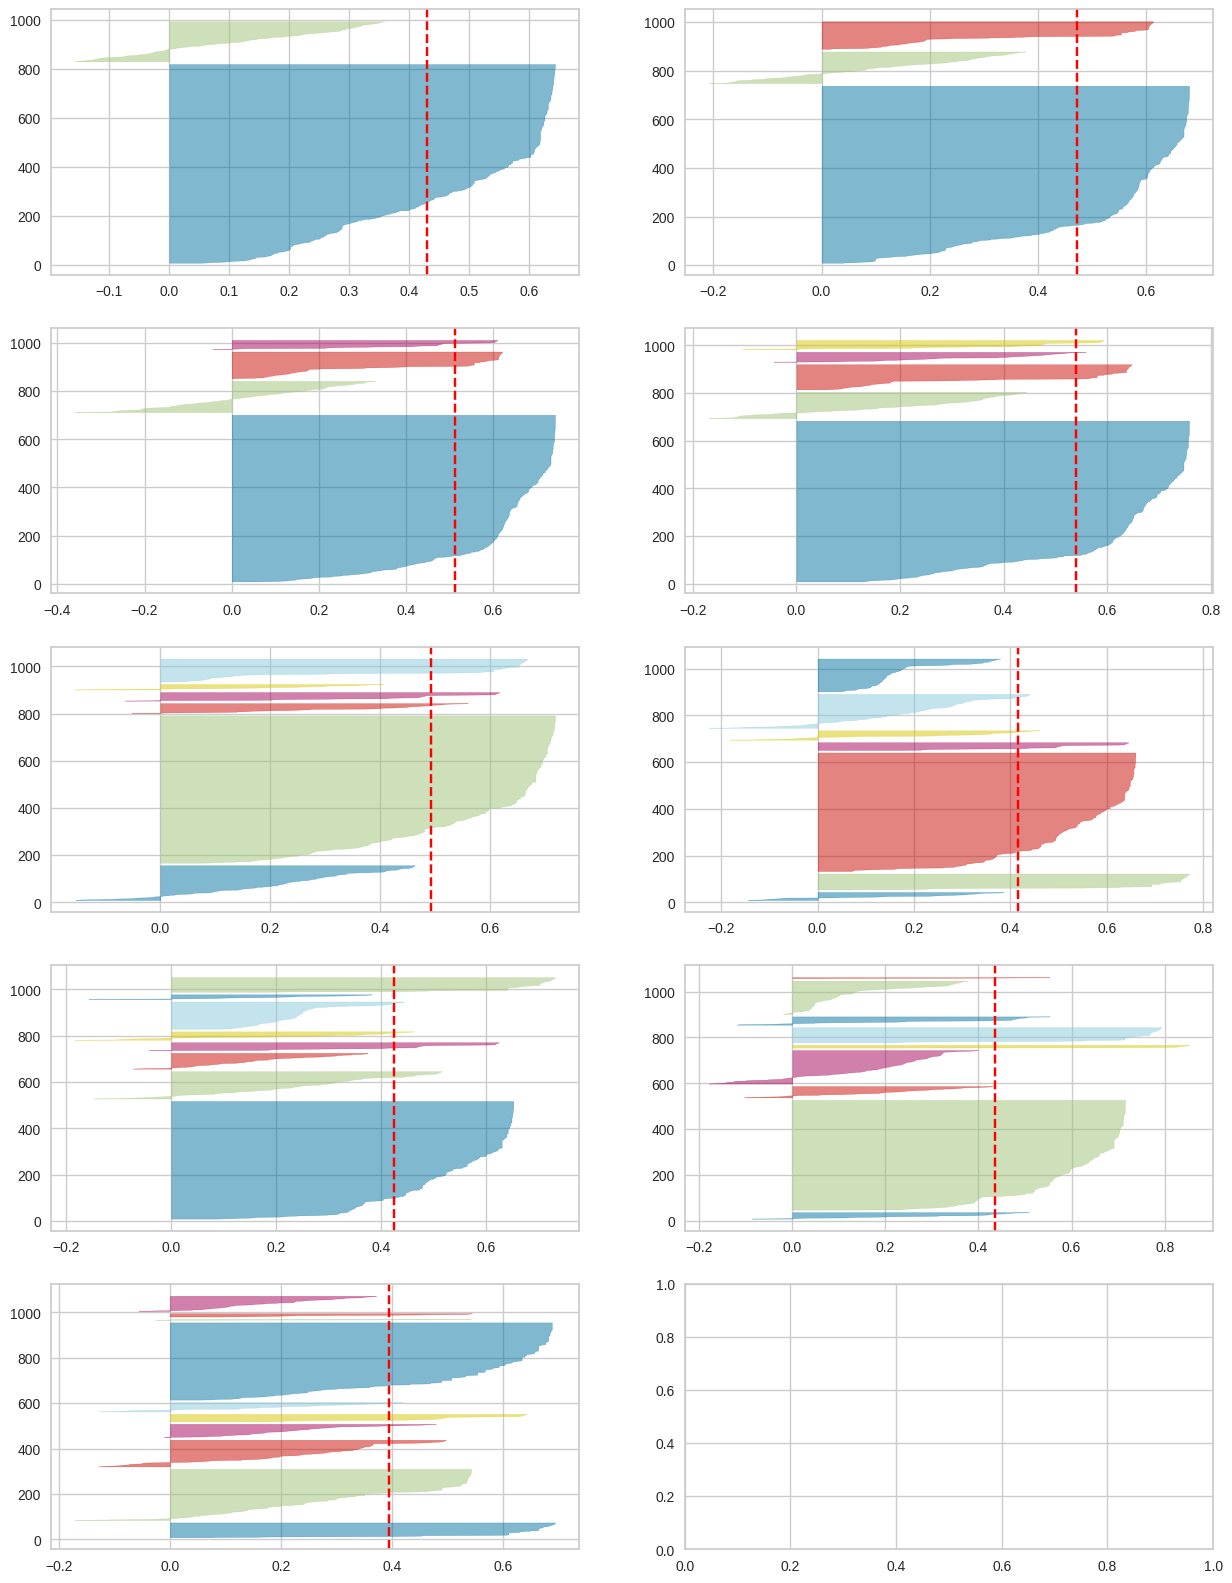

In [97]:
# Silhouette Analysis - https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib import pyplot as plt

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

fig, ax = plt.subplots(5, 2, figsize=(15,20))

for num in n_clusters:

    # Run KMeans
    kmeans = KMeans(n_clusters=num, n_init=10, random_state=0)
    q, mod = divmod(num, 2)

    # Visualize
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(kmeans_scaled)

#### k=5 gives us the highest silhouette score, so we will use that for our KMeans model.

In [98]:
# Modelling
k_model = KMeans(n_clusters=5, random_state=0, n_init='auto')

kmeans_labeled = kmeans_scaled.iloc[:]
kmeans_labeled['label'] = k_model.fit(kmeans_scaled).labels_

In [99]:
# PCA for visualization

import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA

pca_k = PCA(n_components=3)

pca_k_3 = pca_k.fit_transform(kmeans_scaled)
pca_k_3_df = pd.DataFrame(pca_k_3)

print(f' Top 3 PCAs expalain {pca_k.explained_variance_ratio_.sum()*100.:2f}% of variance')

 Top 3 PCAs expalain 74.839580% of variance


In [100]:
# Visualizing PCAs w/ KMeans cluster labels
px.scatter_3d(data_frame=pca_k_3_df, x=0, y=1, z=2,  color=kmeans_labeled['label'])


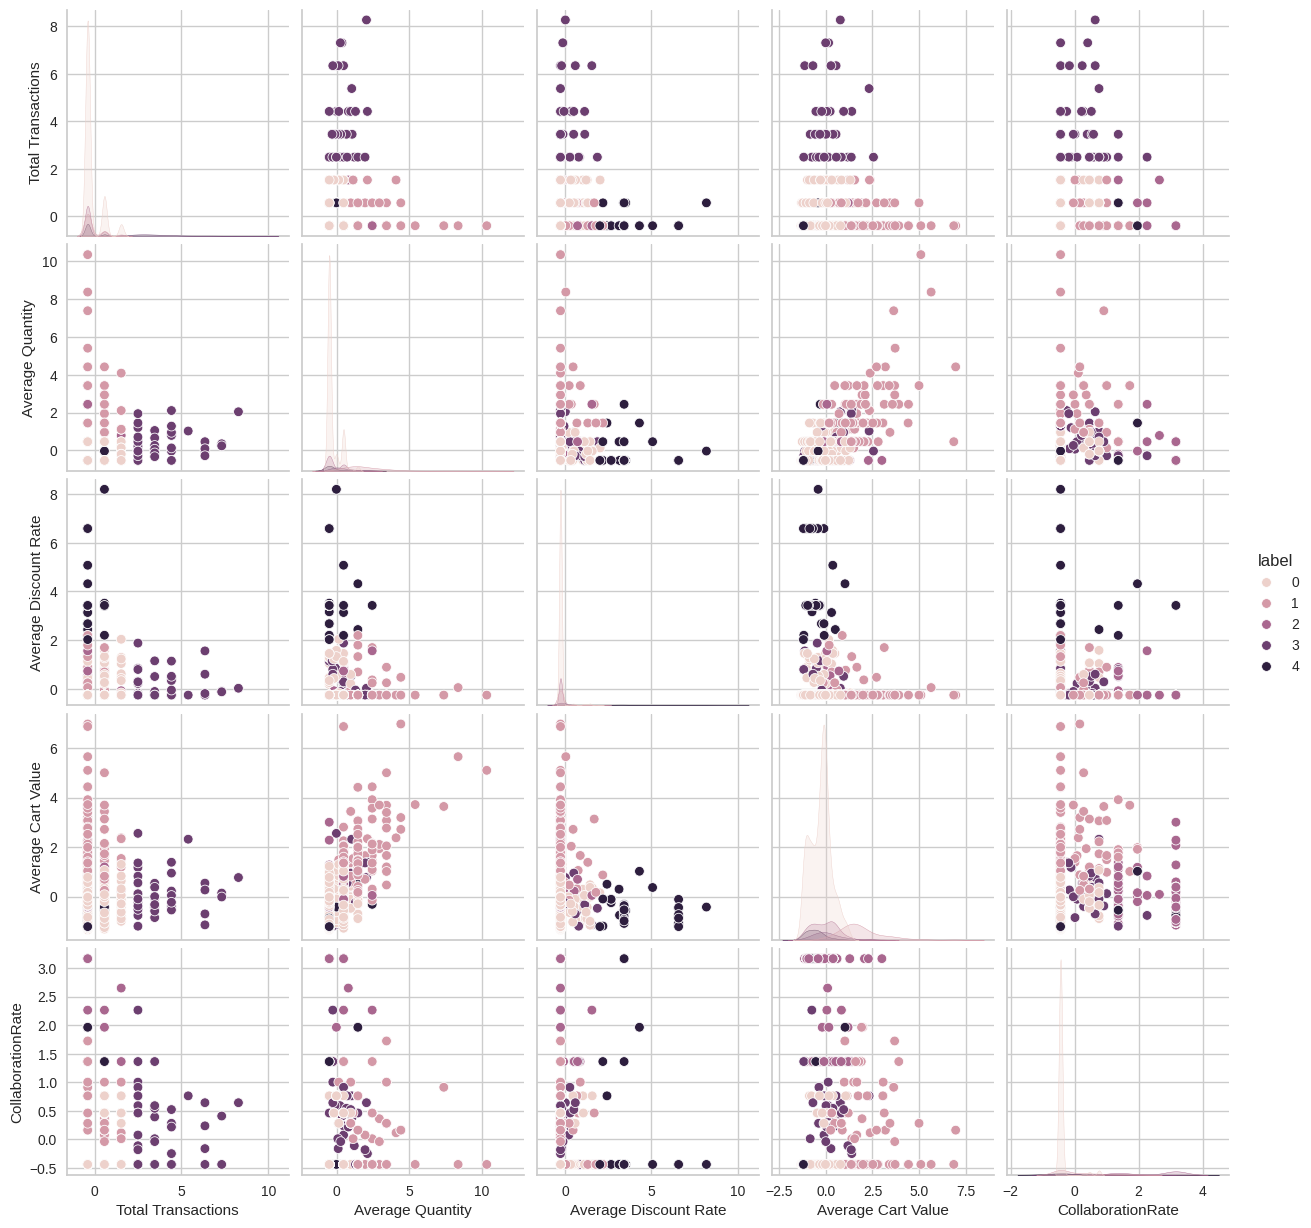

In [101]:
# Visualizing Clusters using Pair Plots
sns.pairplot(data=kmeans_labeled, hue = 'label')

In [102]:
# Creating Cluster Characteristics Table for easier analysis
k_means_characteristics = pd.DataFrame(sc.inverse_transform(kmeans_labeled.groupby('label').agg('mean').reset_index().drop('label', axis=1)), columns = kmeans_scaled.columns)
k_means_characteristics['Size'] = kmeans_labeled.groupby('label')['Total Transactions'].agg('count').reset_index()['Total Transactions']
k_means_characteristics

,Total Transactions,Average Quantity,Average Discount Rate,Average Cart Value,CollaborationRate,Size
0,1.238519,1.221728,0.008079,85467.278025,0.010346,675
1,1.279279,3.509009,0.018489,252748.215526,0.123244,111
2,1.169811,1.378931,0.006773,103445.330189,0.816262,106
3,5.380952,1.890788,0.053206,114442.937944,0.177192,42
4,1.125000,1.287500,0.664346,64111.937500,0.100000,40


#### Interpretation of K-Means Clustering

* ##### Cluster 0: Size = Medium , Total Transactions = Low , Avg Qty = Medium , Avg Disc = Low, Avg Cart Value = Medium , CollabRate = High
Value to business = Moderate - These customers only purchase items that are collaboration, and pay full price.       
* ##### Cluster 1: Size = Large, Total Transactions = Low, Avg Qty = Low, Avg Disc = Low, Avg Cart Value = Low, CollabRate = Low
Value to business = Moderate (due to size) - These are the bulk of customers who shop occasionally, and purchase relatively low cost items at full price   
* ##### Cluster 2: Size = Medium, Total Transactions = High, Avg Qty = Medium, Avg Disc = Medium, Avg Cart Value = Medium, CollabRate = Medium
Value to business = High - These are regular customers that purchase medium priced items very often, at a moderate discount. A moderate preferance for collabs
* ##### Cluster 3: Size = Low, Total Transactions = Low, Avg Qty = Low, Avg Disc = High, Avg Cart Value = Low, CollabRate = Medium
Value to business = Low - These are bargain hunters, only buying low cost items at a heavy discount
* ##### Cluster 4: Size = Low, Total Transactions = High, Avg Qty = High, Avg Disc = Low , Avg Cart Value = High, CollabRate = Medium
Value to business = High - These are the whales, customers that shop occasionally but spend heavily each visit.

## Does Hierarchical Clustering fare differently?

In [103]:
# Using PCA to remove noise and form cleaner clusters

pca_h = PCA(n_components=4)

pca_h_df = pd.DataFrame(pca_h.fit_transform(kmeans_scaled))

print(f' Top 3 PCAs expalain {pca_h.explained_variance_ratio_.sum()*100.:2f}% of variance')

 Top 3 PCAs expalain 93.685011% of variance


In [104]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

# Calculating optimal number of clusters

n_clusters = [2,3,4,5,6,7,8,9,10]
linkage_methods = ['single','complete', 'average', 'centroid', 'weighted', 'median', 'ward']
# clustering_critera = ['inconsistent', 'distance','maxclust']
scores = pd.DataFrame()
iterator = 0

# Calculating silhouette score for each linkage_method and n_clust combination
for num in n_clusters:
  for method in linkage_methods:
    Z = linkage(kmeans_scaled, method=method)
    cluster_labels = fcluster(Z, num, criterion='maxclust')
    silhouette_score(kmeans_scaled, cluster_labels)

    scores.loc[iterator, 'n_clust'] = num
    scores.loc[iterator, 'method'] = method
#   scores['criterion'] = criterion
    scores.loc[iterator,'silhouette score'] = silhouette_score(kmeans_scaled, cluster_labels)
    iterator += 1


In [105]:
# Plotting Scores
px.scatter_3d(data_frame=scores,x = 'n_clust', y='method', z='silhouette score', title="Silhouette Scores by linkage method and n_clust - Hierarchical Clustering").update_layout(xaxis_title='Number of Clusters', yaxis_title="Silhouette Score")

#### Average, Centroid and median provide highest silhouette scores, but they generate highly imbalanced cluster sizes. So we will use weighted, with n_clust = 3 (which forms relatively more balanced clusters with a similarly high silhouette scores).

In [106]:
# Modelling

Z = linkage(kmeans_scaled, method='weighted')
cluster_labels = fcluster(Z,3, criterion='maxclust')
hierarchical_labeled = kmeans_scaled.loc[:]
hierarchical_labeled['label'] = cluster_labels
hierarchical_labeled.groupby('label')['Total Transactions'].agg('count').reset_index()['Total Transactions']

0     21
1     58
2    895
Name: Total Transactions, dtype: int64

In [107]:
# Using PCA to visualize clusters

px.scatter_3d(data_frame=pca_h_df, x=0, y=1, z=2,  color=hierarchical_labeled['label'])


#### Visually, the Hierarchical clustering appear more disctinct especially when dealing with sparse outliers (which KMeans sometimes has difficulty handling)


In [108]:
# Hierarchical Cluster Characteristics

hierarchical_characteristics = pd.DataFrame(sc.inverse_transform(hierarchical_labeled.groupby('label').agg('mean')), columns = kmeans_scaled.columns)
hierarchical_characteristics['Size'] = hierarchical_labeled.groupby('label')['Total Transactions'].agg('count').reset_index()['Total Transactions']
hierarchical_characteristics

,Total Transactions,Average Quantity,Average Discount Rate,Average Cart Value,CollaborationRate,Size
0,1.333333,5.460317,0.020818,413296.428571,0.156665,21
1,1.224138,1.500000,0.528846,81434.698276,0.096839,58
2,1.423464,1.440871,0.006616,101317.668138,0.122595,895


#### Interpretation of Hierarchical Clustering

* ##### Cluster 1 (Blue): Size = Small , Total Transactions = Medium , Avg Qty = High , Avg Disc = Low, Avg Cart Value = High , CollabRate = High
Value to business = High - These are the whales, customers that shop occasionally but spend heavily each visit.       
* ##### Cluster 2 (Pink): Size = Small, Total Transactions = Low, Avg Qty = Low, Avg Disc = High, Avg Cart Value = Low, CollabRate = Low
Value to business = Low - These are bargain hunters, only buying low cost items at a heavy discount
* ##### Cluster 3 (Yellow): Size = High, Total Transactions = High, Avg Qty = Low, Avg Disc = Low, Avg Cart Value = Medium, CollabRate = Medium
Value to business = High (due to size) - These are regular customers that purchase medium priced items occasionally, at full price. A moderate preferance for collabs



## Summary

*   Both KMeans and Hierarchical clustering identified clusters that represented certain kinds of customers based on their purchasing activity (Bargain Hunters, Big Spenders, Collaboration Hunters, Occasional Shoppers etc.). These clusters can be used by the company to personalize their marketing strategies based on the preferences of each segment.
*   KMeans provided 5 clusters for analysis, but each cluster was not a discreet as the hierarchical method's clusters. However, Hierarchical clustering provided much more uneven clusters (though not all customer segments are evenly sized in reality). This is the trade off between the two methods in our use case, and further optimization can be done to improve both the inter-cluster distance and the intra-cluster similarity of our clustering.



